In [1]:
%matplotlib inline

## Matplotlib Examples

In [2]:
# import libraries
import matplotlib.pyplot as plt
import numpy as np

### Plot Chart

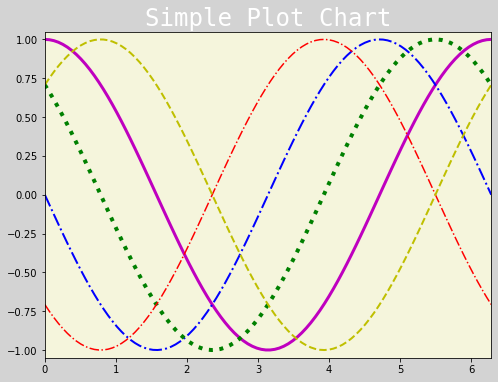

In [3]:
X = np.linspace(0, 2*np.pi, 100)
Y1 = np.cos(X)
Y2 = np.cos(X + np.pi/2)
Y3 = np.cos(X + np.pi/4)
Y4 = np.cos(X + 3*np.pi/4)
Y5 = np.cos(X - np.pi/4)

# standard figsize is 6.4 in x 4.8 in (ratio=1.333), 1 in = 2.54 cm
# common ratios      16:9  =  1.778
#                     4:3  =  1.333
#                    16:10 =  1.6
plt.figure(figsize=(8, 6), facecolor='lightgrey')

plt.axis([0, 2*np.pi, -1.05, 1.05])
plt.plot(X, Y1, color='m', ls='-', linewidth=3)
plt.plot(X, Y2, color='b', ls='-.', linewidth=2)
plt.plot(X, Y3, color='g', ls=':', linewidth=4)
plt.plot(X, Y4, color='r', ls='-.', linewidth=1.5)
plt.plot(X, Y5, color='y', ls='--', linewidth=2)
plt.title('Simple Plot Chart', size=24, color='w', weight='normal', 
    family='monospace')
plt.axvspan(0, 2*np.pi, facecolor='beige')

# in case you want to save the chart to file, do so before calling 
# plt.show(), as latter distroys the "figure"
# different file formats are available for saving the chart (png, jpg, pdf)
# for png and jpg files you can adjust the picture size through the dpi parameter 
plt.savefig('plot-chart.png', dpi=100)

#plt.show()

### Histogramm

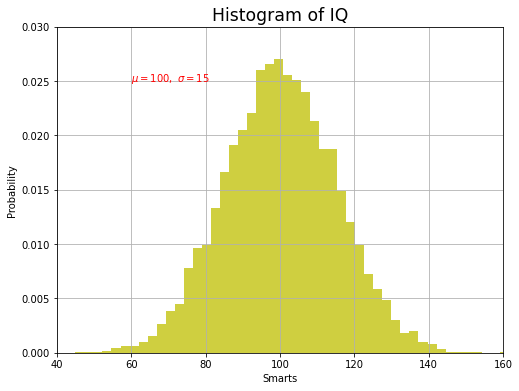

In [4]:
mu, sigma = 100, 15
x = mu + sigma * np.random.randn(10000)

# set the plot size (standard: 6.4 in x 4.8 in)
plt.figure(figsize=(8, 6))

# the histogram of the data
n, bins, patches = plt.hist(x, 50, density=1, facecolor='y', alpha=0.75)

plt.xlabel('Smarts')
plt.ylabel('Probability')
plt.title('Histogram of IQ', size='xx-large')
plt.text(60, .025, r'$\mu=100,\ \sigma=15$', color='r')
plt.axis([40, 160, 0, 0.03])
plt.grid(True)

### Scatter Plot

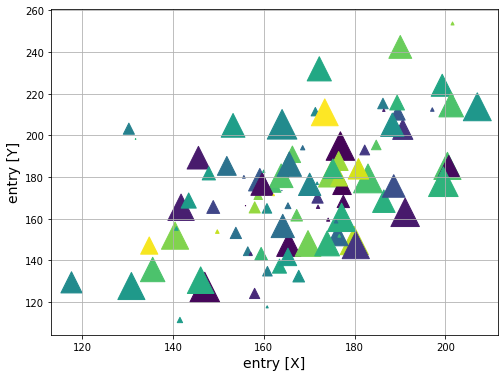

In [5]:
import seaborn as sns
np.random.seed(42)
N = 100
x = np.random.normal(170, 20, N)
y = x + np.random.normal(5, 25, N)
colors = np.random.rand(N)
area = (30 * np.random.rand(N))**2

df = {'X': x,
      'Y': y,
      'color': colors,
      'bubble_size': area}

plt.figure(figsize=(8, 6))
plt.scatter('X', 'Y', c='color', s='bubble_size', data=df, marker='^')
plt.xlabel('entry [X]', size=14)
plt.ylabel('entry [Y]', size=14)
plt.grid(True)

add linear regression with confidence interval ci=95% to scatter plot using the `seaborn` library

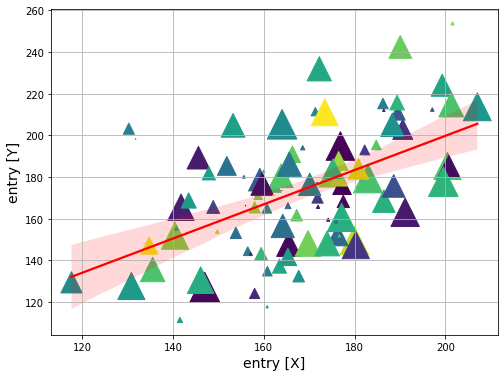

In [6]:
import seaborn as sns
plt.figure(figsize=(8, 6))
plt.scatter('X', 'Y', c='color', s='bubble_size', data=df, marker='^')
sns.regplot(x='X', y='Y', scatter=False, ci=95, data=df, color='r')
plt.xlabel('entry [X]', size=14)
plt.ylabel('entry [Y]', size=14)
plt.grid(True)

### Imshow

#### Display Image

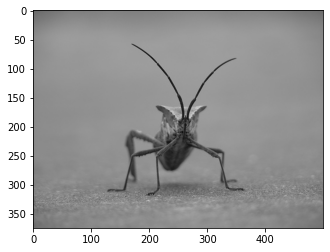

In [7]:
import imutils
url = 'https://raw.githubusercontent.com/matplotlib/matplotlib/master/doc/_static/stinkbug.png'
img = imutils.url_to_image(url)
# imutils uses cv2 to load the image, hence the image is in the BGR channel order
# matplotlib.pyplot works with RGB channel ordering. imutils offers the convenience function
# imutils.opencv2matplotlib for such tasks
plt.show(plt.imshow(imutils.opencv2matplotlib(img)))

#### Simple Heatmap

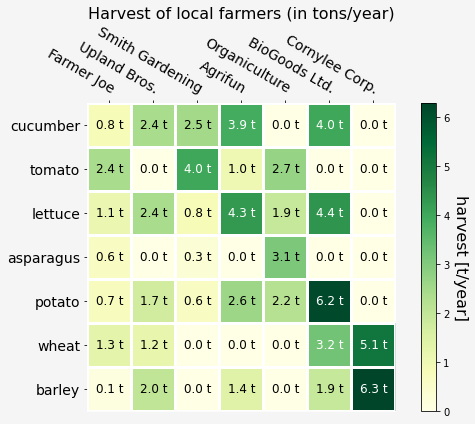

In [8]:
# dataset
vegetables = ["cucumber", "tomato", "lettuce", "asparagus",
              "potato", "wheat", "barley"]
farmers = ["Farmer Joe", "Upland Bros.", "Smith Gardening",
           "Agrifun", "Organiculture", "BioGoods Ltd.", "Cornylee Corp."]

harvest = np.array([[0.8, 2.4, 2.5, 3.9, 0.0, 4.0, 0.0],
                    [2.4, 0.0, 4.0, 1.0, 2.7, 0.0, 0.0],
                    [1.1, 2.4, 0.8, 4.3, 1.9, 4.4, 0.0],
                    [0.6, 0.0, 0.3, 0.0, 3.1, 0.0, 0.0],
                    [0.7, 1.7, 0.6, 2.6, 2.2, 6.2, 0.0],
                    [1.3, 1.2, 0.0, 0.0, 0.0, 3.2, 5.1],
                    [0.1, 2.0, 0.0, 1.4, 0.0, 1.9, 6.3]])

# create heatmap using the imshow() function of matplotlib.pyplot
fig, ax = plt.subplots(figsize=(8, 6), facecolor="whitesmoke")
im = ax.imshow(harvest, cmap="YlGn")

# create colorbar
cbar = ax.figure.colorbar(im, ax=ax)
cbar.ax.set_ylabel(ylabel="harvest [t/year]", rotation=-90, va="bottom", size=16)

# we want to show all ticks...
ax.set_xticks(np.arange(harvest.shape[1]))
ax.set_yticks(np.arange(harvest.shape[0]))
# ... and label them with the respective list entries.
ax.set_xticklabels(farmers, size=14)
ax.set_yticklabels(vegetables, size=14)

# let the horizontal axes labeling appear on top
ax.tick_params(top=True, bottom=False,
                   labeltop=True, labelbottom=False)

# rotate the tick labels and set their alignment.
plt.setp(ax.get_xticklabels(), rotation=-30, ha="right",
         rotation_mode="anchor")

# set spines color to white and create white grid.
#ax.spines[:].set_visible(False)
ax.spines[:].set_color("w")
ax.grid(which="minor", color="w", linestyle='-', linewidth=3)
ax.tick_params(which="minor", bottom=False, left=False)
ax.set_xticks(np.arange(len(farmers)+1)-.5, minor=True)
ax.set_yticks(np.arange(len(vegetables)+1)-.5, minor=True)

# the annotations shall get different colors depending on a threshold for
# better contrast against the pixel color
# thresh set to 50%, value can be changed by replacing "harvest.max() / 2.0" to 
# value in the range of the harvest dataset
thresh = im.norm(harvest.max()/2.)
textcolors = ["black", "white"]

for i in range(harvest.shape[1]):
    for j in range(harvest.shape[0]):
        text = plt.text(j, i, str("{:.1f} t".format(harvest[i, j])),
                    ha="center", va="center", 
                    color=textcolors[int(im.norm(harvest[i, j]) > thresh)], 
                    size=12, weight='normal')

ax.set_title("Harvest of local farmers (in tons/year)", size=16)
fig.tight_layout()

### Bullet Chart

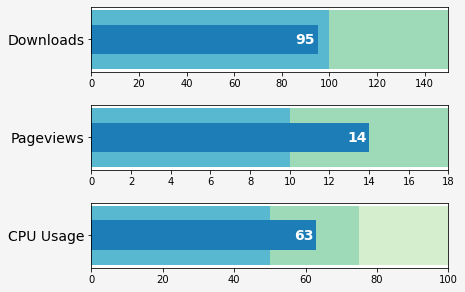

In [9]:
# dataset
limits = [[100, 150],
          [10, 18],
          [50, 75, 100]]

data_to_plot = [("Downloads", "", 95),
                ("Pageviews", "[k]", 14),
                ("CPU Usage", "[%]", 63)]

# select color palette
palette = sns.color_palette("GnBu_r", len(limits) + 1)

fig, ax = plt.subplots(nrows=len(limits), ncols=1, figsize=(6.4, 4.8), facecolor="whitesmoke")
plt.subplots_adjust(hspace=0.5)


for i in range(0, len(limits)):
    limit = limits[i]
    data = data_to_plot[i]
    ax[i].set_aspect('auto')
    ax[i].set_yticks([1])
    ax[i].set_yticklabels([data[0]], size=14)
    ax[i].set_xlim(0, limit[-1])

    prev_limit = 0
    for idx, lim in enumerate(limit):
        ax[i].barh([1], width=lim-prev_limit, left=prev_limit, height=0.8, color=palette[idx + 1])
        prev_limit = lim
    
    # Draw the value we're measuring
    rects = ax[i].barh([1], data[2], color=palette[0], height=0.4)
    ax[i].bar_label(rects, label_type='edge', padding=-22, color='w', weight="semibold", size=14)


### Discrete Distribution as Horizontal Bar Chart

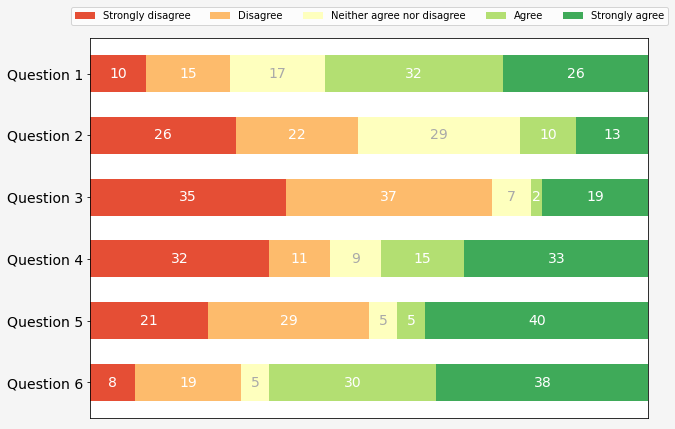

In [29]:
# dataset
category_names = ['Strongly disagree', 'Disagree',
                  'Neither agree nor disagree', 'Agree', 'Strongly agree']
results = {
    'Question 1': [10, 15, 17, 32, 26],
    'Question 2': [26, 22, 29, 10, 13],
    'Question 3': [35, 37, 7, 2, 19],
    'Question 4': [32, 11, 9, 15, 33],
    'Question 5': [21, 29, 5, 5, 40],
    'Question 6': [8, 19, 5, 30, 38]
}

def survey(results, category_names):
    """
    Parameters
    ----------
    results : dict
        A mapping from question labels to a list of answers per category.
        It is assumed all lists contain the same number of entries and that
        it matches the length of *category_names*.
    category_names : list of str
        The category labels.
    """
    labels = list(results.keys())
    data = np.array(list(results.values()))
    data_cum = data.cumsum(axis=1)
    category_colors = plt.get_cmap('RdYlGn')(
        np.linspace(0.15, 0.85, data.shape[1]))

    fig, ax = plt.subplots(figsize=(10, 7), facecolor="whitesmoke")
    ax.invert_yaxis()
    ax.xaxis.set_visible(False)
    ax.set_xlim(0, np.sum(data, axis=1).max())
    ax.set_yticks(np.arange(len(labels)))
    ax.set_yticklabels(labels, size=14)

    for i, (colname, color) in enumerate(zip(category_names, category_colors)):
        widths = data[:, i]
        starts = data_cum[:, i] - widths
        rects = ax.barh(labels, widths, left=starts, height=0.6,
                        label=colname, color=color)

        r, g, b, _ = color
        text_color = 'white' if r * g * b < 0.5 else 'darkgrey'
        ax.bar_label(rects, label_type='center', color=text_color, size=14)
    
    ax.legend(ncol=len(category_names), bbox_to_anchor=(0.5, 1.02),
              loc='lower center', fontsize='medium')

    return fig, ax

plt.show(survey(results, category_names))